Mục tiêu bài thực hành 3 này là trình bày cách thực hiện Optimization ADAM, RMSprop, Batch-Norm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from init_utils import plot_decision_boundary
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

(300, 2)


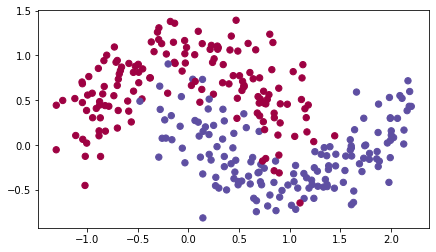

In [2]:
np.random.seed(3)
train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_Y = train_Y.reshape((train_Y.shape[0],1))
print(train_X.shape)

In [3]:
def model(input_shape):
    X_input = Input(input_shape)
    X = Dense(5, activation = "relu")(X_input)
    X = Dense(2, activation = "relu")(X)
    X = Dense(1, activation = "sigmoid")(X)
    model = Model(inputs = X_input, outputs = X, name = "model")

    return model

In [4]:
Model = model(train_X.shape[1:])

In [5]:
Model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [6]:
Model.fit(x= train_X, y = train_Y, batch_size = 32, epochs = 300)

[==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9144
Epoch 282/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9127
Epoch 283/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9311
Epoch 284/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9140
Epoch 285/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9292
Epoch 286/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9265
Epoch 287/300
10/10 [==============================] - 0s 7ms/step - loss: 0.3180 - accuracy: 0.8918
Epoch 288/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9089
Epoch 289/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9258
Epoch 290/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9299
Epoch 291/

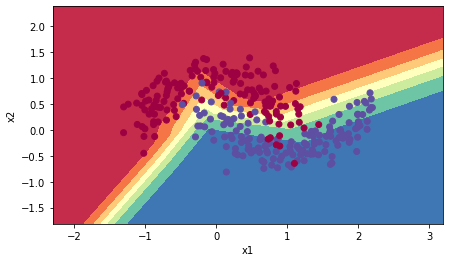

In [7]:
plot_decision_boundary(lambda x: Model.predict(x), train_X.T, train_Y.T)

In [8]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [9]:
Model.fit(x= train_X, y = train_Y, batch_size = 32, epochs = 300)

[==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9172
Epoch 282/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9466
Epoch 283/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9249
Epoch 284/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9152
Epoch 285/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9118
Epoch 286/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9101
Epoch 287/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9230
Epoch 288/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9380
Epoch 289/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9229
Epoch 290/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9210
Epoch 291/

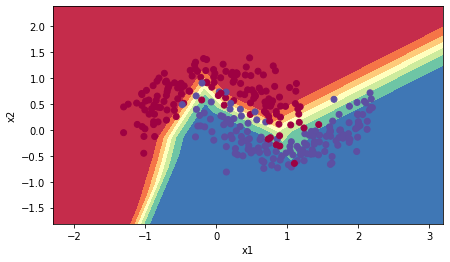

In [10]:
plot_decision_boundary(lambda x: Model.predict(x), train_X.T, train_Y.T)

In [3]:
def model1(input_shape):
    X_input = Input(input_shape)
    X = Dense(5, activation='relu')(X_input)
    X = BatchNormalization(axis = 1)(X)
    X = Dense(2, activation='relu')(X)
    X = BatchNormalization(axis = 1)(X)
    X = Dense(1, activation='sigmoid')(X)
    model = Model(inputs = X_input, outputs = X, name='model2')

    return model

In [4]:
Model1 = model1(train_X.shape[1:])

In [5]:
Model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [6]:
Model1.fit(x= train_X, y = train_Y, batch_size = 32, epochs = 300)

[==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9247
Epoch 282/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9220
Epoch 283/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9535
Epoch 284/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397
Epoch 285/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9470
Epoch 286/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9327
Epoch 287/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9239
Epoch 288/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9242
Epoch 289/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9201
Epoch 290/300
10/10 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9181
Epoch 291/

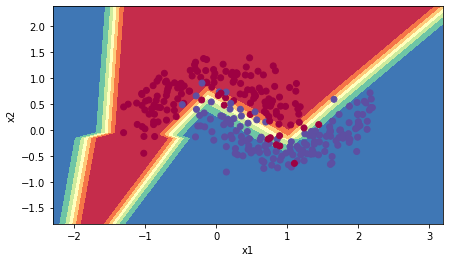

In [7]:
plot_decision_boundary(lambda x: Model1.predict(x), train_X.T, train_Y.T)